In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [2]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [3]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best parameters: {regression.best_params_}')

In [4]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [47]:
df_test.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,778.81,789.63,775.80,786.14,1657300.0,3,1,2017
1,788.36,791.34,783.16,786.90,1073000.0,4,1,2017
2,786.08,794.48,785.02,794.02,1335200.0,5,1,2017
3,795.26,807.90,792.20,806.15,1640200.0,6,1,2017
4,806.40,809.97,802.83,806.65,1272400.0,9,1,2017


In [48]:
df_train.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,325.25,332.83,324.97,663.59,7380500.0,3,1,2012
1,331.27,333.87,329.08,666.45,5749400.0,4,1,2012
2,329.83,330.75,326.89,657.21,6590300.0,5,1,2012
3,328.34,328.77,323.68,648.24,5405900.0,6,1,2012
4,322.04,322.29,309.46,620.76,11688800.0,9,1,2012


In [5]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Volume'] = df_train['Volume'].apply(lambda x : x.replace(',', '')).astype(float)
df_train['Close'] = df_train['Close'].apply(lambda x : x.replace(',', '')).astype(float)
df_train.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [6]:
corr = df_train.corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000


<AxesSubplot:>

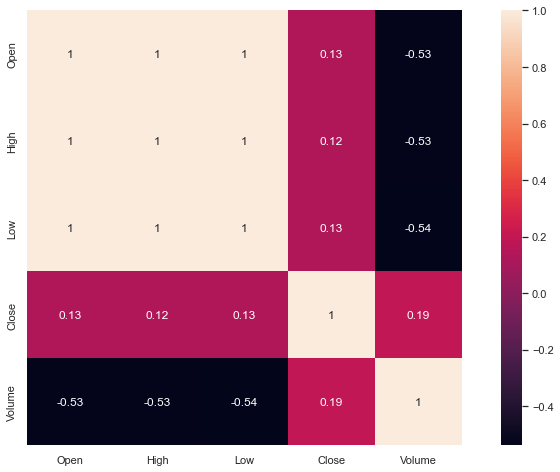

In [7]:
plt.figure(figsize = (14, 8))

sns.heatmap(corr, square=True, annot=True)

In [8]:
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year
df_train.drop(columns=['Date'], inplace=True)

In [9]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Day'] = df_test['Date'].dt.day
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test['Volume'] = df_test['Volume'].apply(lambda x : x.replace(',', '')).astype(float)
df_test.drop(columns=['Date'], inplace=True)
df_test.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,778.81,789.63,775.80,786.14,1657300.0,3,1,2017
1,788.36,791.34,783.16,786.90,1073000.0,4,1,2017
2,786.08,794.48,785.02,794.02,1335200.0,5,1,2017
3,795.26,807.90,792.20,806.15,1640200.0,6,1,2017
4,806.40,809.97,802.83,806.65,1272400.0,9,1,2017


In [49]:
df_test.describe()

,Open,High,Low,Close,Volume,Day,Month,Year
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.0,20.0
mean,807.526000,811.926500,801.949500,807.904500,1.659895e+06,16.650000,1.0,2017.0
std,15.125428,14.381198,13.278607,13.210088,6.774747e+05,8.963523,0.0,0.0
min,778.810000,789.630000,775.800000,786.140000,9.193000e+05,3.000000,1.0,2017.0
25%,802.965000,806.735000,797.427500,802.282500,1.248500e+06,9.750000,1.0,2017.0
50%,806.995000,808.640000,801.530000,806.110000,1.418050e+06,17.500000,1.0,2017.0
75%,809.560000,817.097500,804.477500,810.760000,1.743400e+06,24.250000,1.0,2017.0
max,837.810000,841.950000,827.010000,835.670000,3.246600e+06,31.000000,1.0,2017.0


<AxesSubplot:ylabel='Close'>

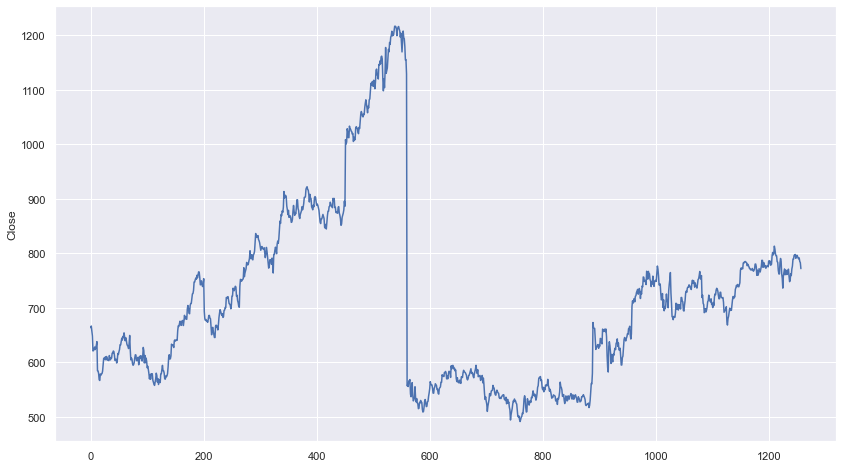

In [10]:
sns.lineplot(data=df_train['Close'])

In [11]:
y_train = df_train['Close']
X_train = df_train.drop(['Close'], axis='columns')

In [12]:
y_test = df_test['Close']
X_test = df_test.drop(['Close'], axis='columns')

Спочатку спробуємо одношарову:

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

perc_reg = MLPRegressor(max_iter=10000)

In [14]:
perc_reg.fit(X_train, y_train)

MLPRegressor(max_iter=10000)

In [15]:
predict_perc = perc_reg.predict(X_test)

regression_score(y_test, predict_perc)

RMSE: 62.65941840953007
MSE: 3926.202715420556
R2: -22.683053152175113
MAPE: 61.658087778132334


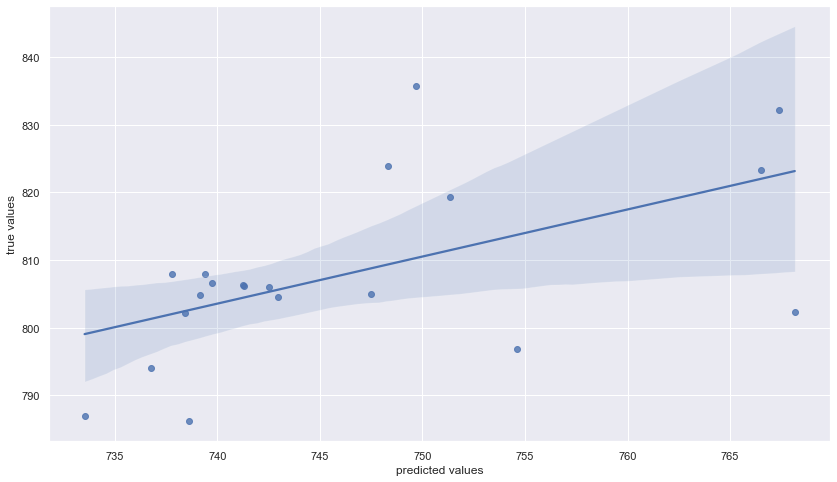

In [16]:
truepredplot(y_test, predict_perc)

In [17]:
predict_perc = perc_reg.predict(X_train)

regression_score(y_train, predict_perc)

RMSE: 159.2471832703858
MSE: 25359.66537955184
R2: 0.06497251584486097
MAPE: 123.55318373575744


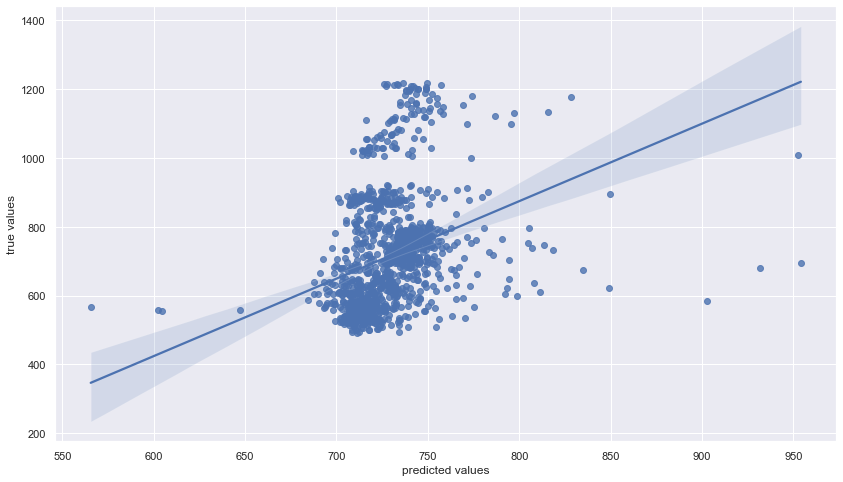

In [18]:
truepredplot(y_train, predict_perc)

Нажаль, нейронні мережі 

Налаштування гіперпараметрів:

In [19]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [20]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [21]:
gridsearchscore(perc_reg_gs)

Best score: -58648.506770770495, Best parameters: {'alpha': 2}


In [22]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 46.118825720560764
MSE: 2126.946085843457
R2: -11.829846254498788
MAPE: 30.329230900687026


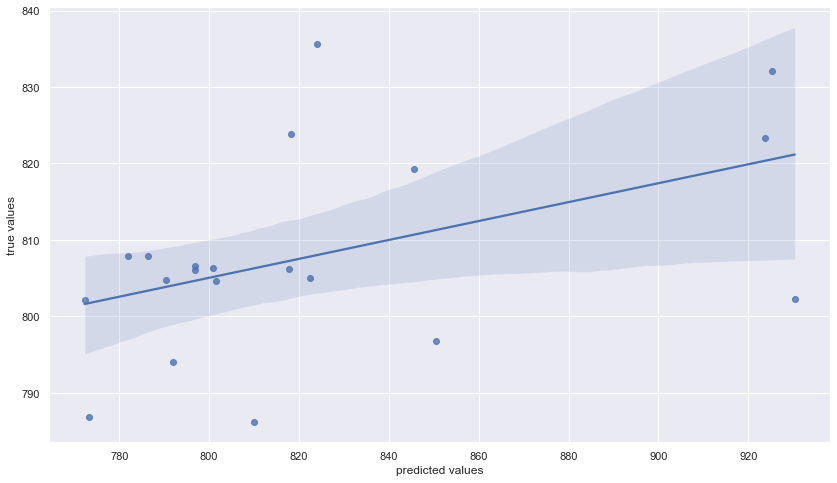

In [23]:
truepredplot(y_test, predict_perc_gs)

In [24]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 187.31225998382592
MSE: 35085.882740248395
R2: -0.2936394931468309
MAPE: 138.91604697469774


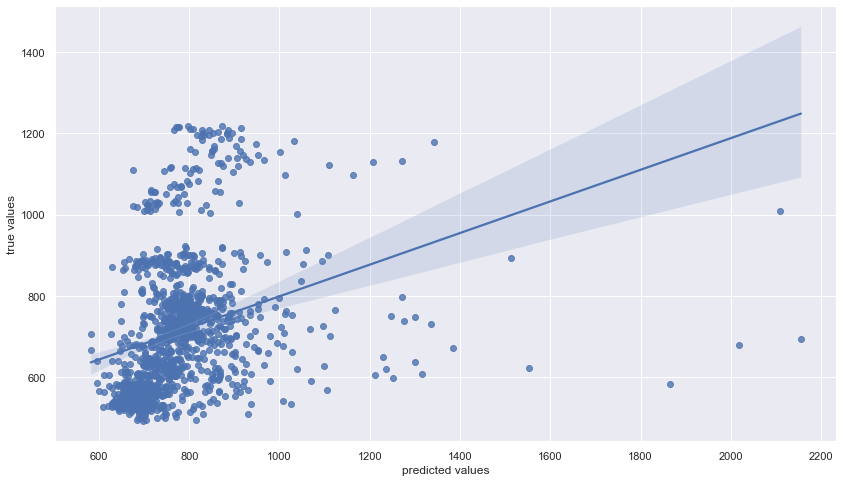

In [25]:
truepredplot(y_train, predict_perc_gs)

hidden_layer_sizes:

In [26]:
parameters = {'hidden_layer_sizes': [(50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [27]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [28]:
gridsearchscore(perc_reg_gs)

Best score: -70313.40299951247, Best parameters: {'hidden_layer_sizes': (150,)}


In [29]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 297.90990980322556
MSE: 88750.314358966
R2: -534.3463803537966
MAPE: 293.8555180280172


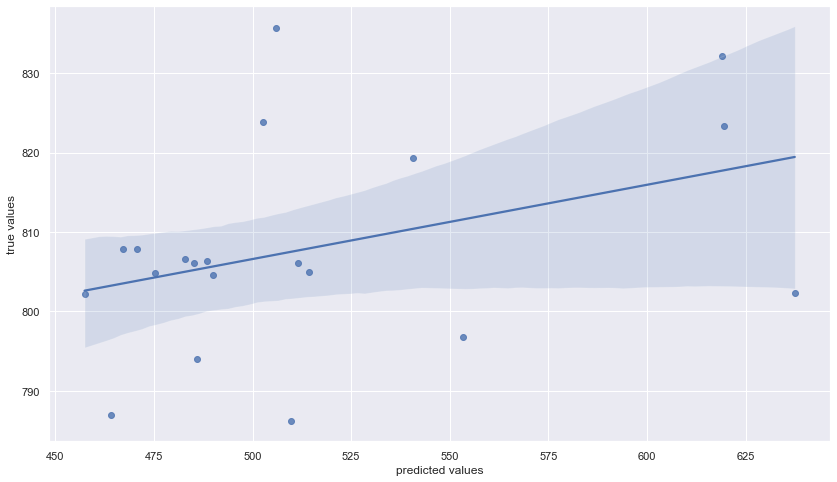

In [30]:
truepredplot(y_test, predict_perc_gs)

In [31]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 237.39771303394636
MSE: 56357.67415374795
R2: -1.077944384838145
MAPE: 178.32671624982464


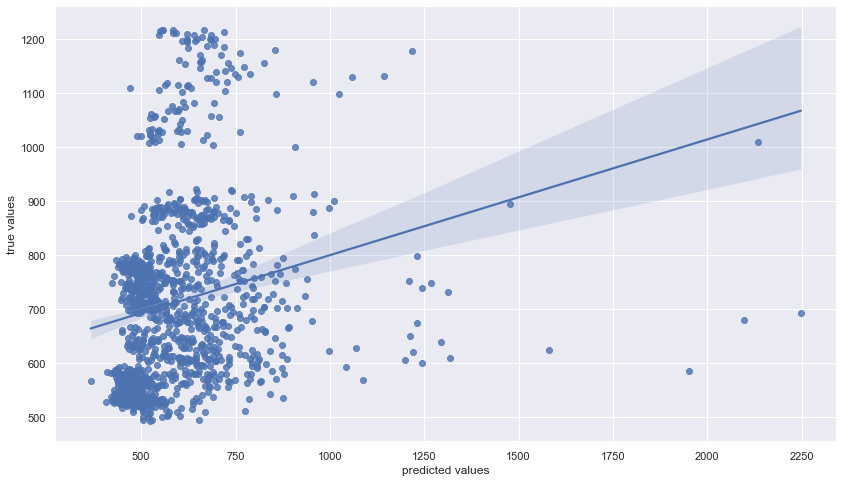

In [32]:
truepredplot(y_train, predict_perc_gs)

Тепер alpha та одношарову hidden_layer_size разом

In [33]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [34]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [35]:
gridsearchscore(perc_reg_gs)

Best score: -79448.91157672097, Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (150,)}


In [36]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 103.00621688250281
MSE: 10610.280716445206
R2: -63.00174936972253
MAPE: 102.7023135681981


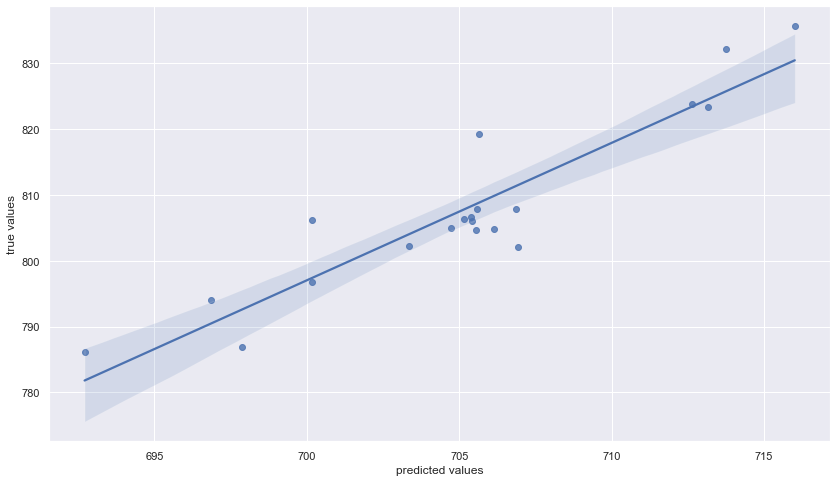

In [37]:
truepredplot(y_test, predict_perc_gs)

In [38]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 215.14777964319575
MSE: 46288.56708539712
R2: -0.7066898075833412
MAPE: 154.5974881142742


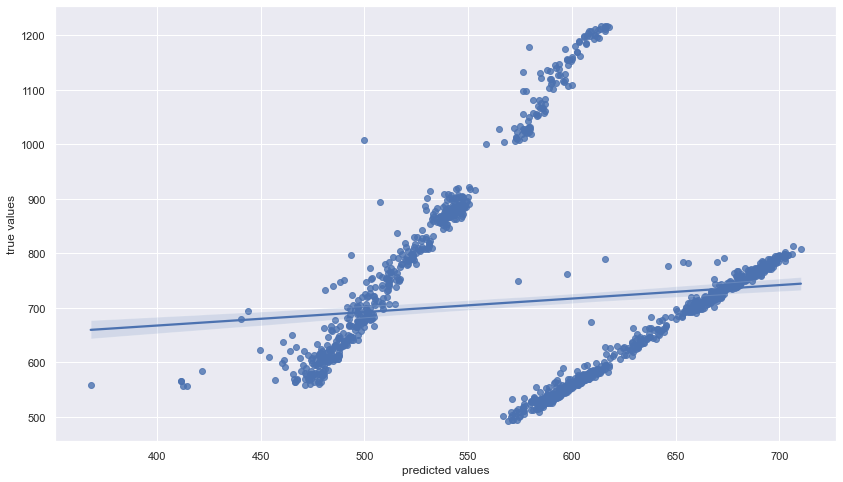

In [39]:
truepredplot(y_train, predict_perc_gs)

Двошарова:

In [40]:
parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(100, 50), (50, 100), (100, 100), (50, 50)]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [41]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(100, 50), (50, 100),
                                                (100, 100), (50, 50)]},
             scoring='neg_mean_squared_error')

In [42]:
gridsearchscore(perc_reg_gs)

Best score: -121489.20144505627, Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}


In [43]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 390.28083681296005
MSE: 152319.13158342434
R2: -917.7966976883381
MAPE: 368.12956951502946


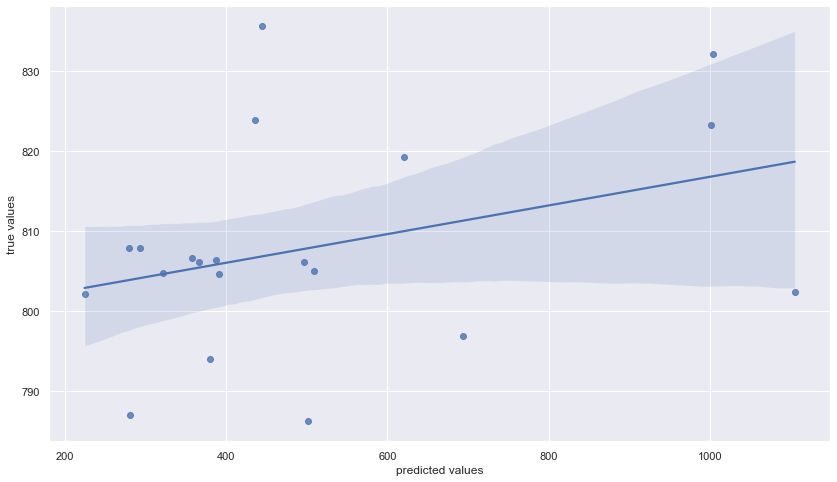

In [44]:
truepredplot(y_test, predict_perc_gs)

In [45]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 902.1645476243576
MSE: 813900.8709902618
R2: -29.009058572489323
MAPE: 536.9814694403279


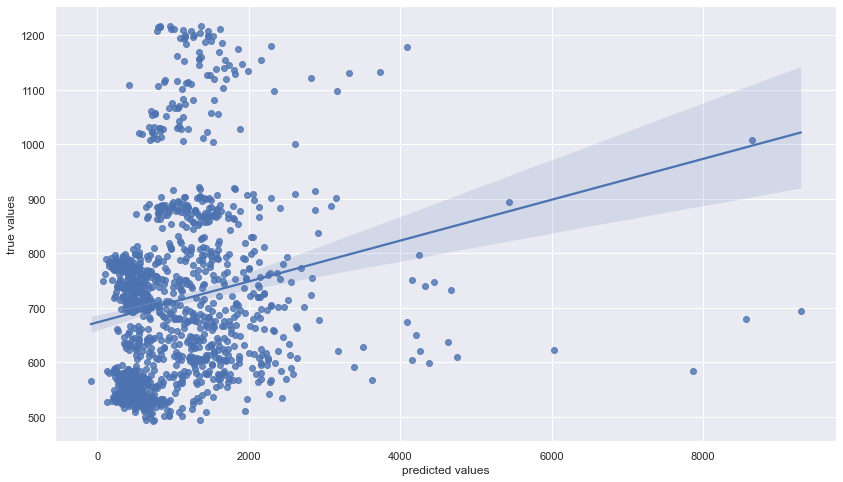

In [46]:
truepredplot(y_train, predict_perc_gs)

Те ж саме, що і минулого разу, модель не розрахована на аналіз часових рядів. 